In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter


In [2]:
# pip install matplotlib

In [3]:
f = '../../data/Plantas termosolares México.xlsx'
df = pd.read_excel(f,index_col=5)
df.sort_index(inplace=True)
df

,Empresa,NOMEDO,Estado,Lat,Lon,Uso,Nombre del colector,Tipo de colector,"Area instalada (gross), m2","Área instalada (apertura), m2","Installed thermal power , kWth",Solar collector loop heat transfer fluid,Solar energy storage,"Storage volume, m³",Kind of conventional heat source,Kind of fuel used
Inicio de operación,,,,,,,,,,,,,,,,
2012.0,Lacto Productos El Indio,Michoacan,"San José de Gracia, Michoacán",NaN,NaN,other process heating,Power Trough 110,parabolic trough collector,401.10,132.0,74.00,water,short-term water storage,5.0,steam boiler,fuel oil
2013.0,Matatlan Dairy,Jalisco,"Matatlán, Zapotlanejo, Jalisco.",NaN,NaN,general processing heating,Power Trough 110,parabolic trough collector,66.00,NaN,46.20,water,short-term water storage,2.5,steam boiler,other
2013.0,Buenavista Greenhouse,Jalisco,"Buenavista, Jalisco, México",NaN,NaN,heating of producction halls,Power Trough 110,parabolic trough collector,112.00,66.0,36.00,water,short-term water storage,2.5,hot water boiler,natural gas
2013.0,Durango Dairy Company (Productos Lácteos COVBARS),Durango,"Av. Francisco Villa 1211, Villa de Guadalupe, ...",24.033543,-104.686407,Pasteurización,Power Trough 110,parabolic trough collector,265.68,132.0,46.20,water,short-term water storage,7.0,steam boiler,fuel oil
2014.0,Biotecnología Mexicana de Microalgas S.A. de C.V.,Jalisco,"Zapopan, Jalisco, Mexico",NaN,NaN,general processing heating,Power Trough 110,parabolic trough collector,110.00,66.0,31.67,water,short-term water storage,10.0,NaN,NaN
2014.0,Quesos La Doñita,Guanajuato,"Neutla, Guanajuato, Mexico",NaN,NaN,Pasteurización,Power Trough 110,parabolic trough collector,66.00,39.6,22.20,water,short-term water storage,1.5,hot water boiler,natural gas
2014.0,Nutrición Marina,Sinaloa,Carretera Federal Libre Los Mochis - San Migue...,NaN,NaN,Cooking,Power Trough 110,parabolic trough collector,310.00,178.2,97.20,water,short-term water storage,7.5,steam boiler,fuel oil
2014.0,NESTLE DAIRY PLANT LAGOS DE MORENO,Jalisco,"Lagos de Moreno, Jalisco",21.368154,-101.922474,Pasteurización,Power Trough 110,parabolic trough collector,1327.59,462.0,137.00,water,short-term water storage,5.0,steam boiler,natural gas
2014.0,NESTLE DAIRY PLANT CHAPA DE CORZO,Chiapas,"Chiapa de Corzo, México\t\n",16.706989,-93.002907,Pasteurización,Power Trough 110,parabolic trough collector,460.00,224.5,126.00,water,short-term water storage,5.0,steam boiler,other


In [4]:
df.columns

Index(['Empresa', 'NOMEDO', 'Estado', 'Lat', 'Lon', 'Uso',
       'Nombre del colector', 'Tipo de colector', 'Area instalada (gross), m2',
       'Área instalada (apertura), m2', 'Installed thermal power , kWth',
       'Solar collector loop heat transfer fluid', 'Solar energy storage',
       'Storage volume, m³', 'Kind of conventional heat source',
       'Kind of fuel used'],
      dtype='object')

In [5]:
df['Installed thermal power , kWth'].sum()

3423.8800000000006

In [6]:
df['Installed thermal power , kWth'].groupby(by=[df.index]).sum()

Inicio de operación
2012.0      74.00
2013.0     128.40
2014.0     476.79
2015.0     897.00
2016.0      86.99
2017.0    1206.02
2018.0     288.68
2019.0     266.00
Name: Installed thermal power , kWth, dtype: float64

In [7]:
df.groupby(by=['NOMEDO',"Inicio de operación"]).sum()[["Installed thermal power , kWth"]]

Installed thermal power , kWth
NOMEDO          Inicio de operación                                
Aguascalientes  2015.0                                        42.00
Baja California 2017.0                                       179.85
Chiapas         2014.0                                       126.00
                2017.0                                        35.34
D.F.            2016.0                                        27.11
Durango         2013.0                                        46.20
Guanajuato      2014.0                                        22.20
                2017.0                                        92.61
Jalisco         2013.0                                        82.20
                2014.0                                       231.39
                2015.0                                       610.70
                2016.0                                        59.88
                2017.0                                       465.87
Michoacan       2012.0                                        74.00
                2015.0                                       126.30
                2017.0                                       112.85
Morelos         2018.0                                       110.88
Oaxaca          2017.0                                       136.79
San Luis Potosi 2015.0                                       118.00
Sinaloa         2014.0                                        97.20
                2017.0                                       104.81
Sonora          2018.0                                       177.80
Yucatan         2017.0                                        77.90

In [8]:
df.groupby(by=["Inicio de operación",'NOMEDO',]).sum()[["Installed thermal power , kWth"]]

Installed thermal power , kWth
Inicio de operación NOMEDO                                         
2012.0              Michoacan                                 74.00
2013.0              Durango                                   46.20
                    Jalisco                                   82.20
2014.0              Chiapas                                  126.00
                    Guanajuato                                22.20
                    Jalisco                                  231.39
                    Sinaloa                                   97.20
2015.0              Aguascalientes                            42.00
                    Jalisco                                  610.70
                    Michoacan                                126.30
                    San Luis Potosi                          118.00
2016.0              D.F.                                      27.11
                    Jalisco                                   59.88
2017.0              Baja California                          179.85
                    Chiapas                                   35.34
                    Guanajuato                                92.61
                    Jalisco                                  465.87
                    Michoacan                                112.85
                    Oaxaca                                   136.79
                    Sinaloa                                  104.81
                    Yucatan                                   77.90
2018.0              Morelos                                  110.88
                    Sonora                                   177.80

In [9]:
# df['Installed thermal power , kWth'].groupby(by=[df.index]).max()

In [10]:
# df['Installed thermal power , kWth'].groupby(by=[df.index]).min()

In [11]:
df['NOMEDO'].unique()

array(['Michoacan', 'Jalisco', 'Durango', 'Guanajuato', 'Sinaloa',
       'Chiapas', 'San Luis Potosi', 'Aguascalientes', 'D.F.',
       'Baja California', 'Yucatan', 'Oaxaca', 'Morelos', 'Sonora', nan],
      dtype=object)

In [12]:
ps = df[['Installed thermal power , kWth']].groupby(by=[df.index]).sum()

<AxesSubplot: xlabel='Inicio de operación'>

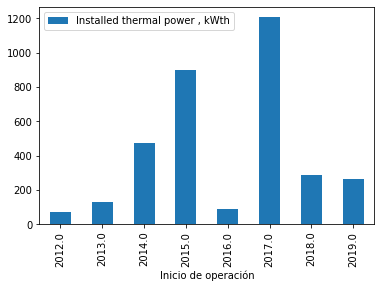

In [13]:
ps.plot(kind='bar')

In [14]:
df['Installed thermal power , kWth'].groupby(by=[df.index]).sum()


Inicio de operación
2012.0      74.00
2013.0     128.40
2014.0     476.79
2015.0     897.00
2016.0      86.99
2017.0    1206.02
2018.0     288.68
2019.0     266.00
Name: Installed thermal power , kWth, dtype: float64

In [15]:
df['Installed thermal power , kWth'].groupby(by=[df.index]).sum().cumsum()


Inicio de operación
2012.0      74.00
2013.0     202.40
2014.0     679.19
2015.0    1576.19
2016.0    1663.18
2017.0    2869.20
2018.0    3157.88
2019.0    3423.88
Name: Installed thermal power , kWth, dtype: float64

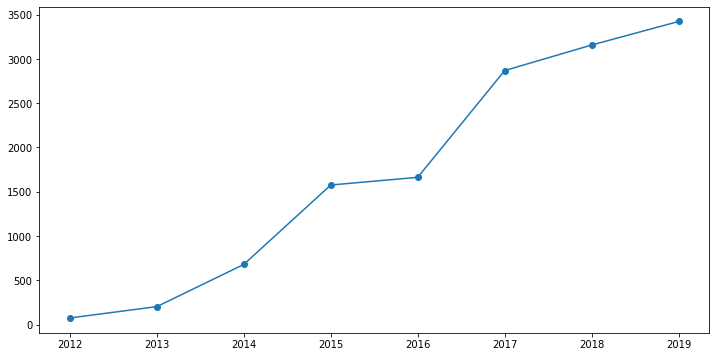

In [16]:
fig, ax = plt.subplots(figsize=(12,6))

ps = df['Installed thermal power , kWth'].groupby(by=[df.index]).sum().cumsum()

ax.plot(ps,'-o')